
# Практическая работа 4-2: Линейная регрессия 2

Name:

Email:


## ##  Анализ набора кредитных данных

Вспомните набор данных «Кредит», рассмотренный на занятии и доступный [здесь](http://www-bcf.usc.edu/~gareth/ISL/data.html).
Этот набор данных состоит из информации о кредитных картах 400 человек.

Сначала импортируйте данные и преобразуйте доход в тысячи.

In [126]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     #Last lecture: used statsmodels.formula.api.ols() for OLS
from sklearn import linear_model         #Last lecture: used sklearn.linear_model.LinearRegression() for OLS

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Import data from Credit.csv file
credit = pd.read_csv('Credit.csv',index_col=0) #load data
credit["Income"] = credit["Income"].map(lambda x: 1000*x)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [127]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})
credit["Income"] = credit["Income"].map(lambda x: 1000*x)

## Задание 1. Первая регрессионная модель

**Упражнение:** Лимит средств по рейтингу:


$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}.
$$

Поскольку кредитные рейтинги в основном используются банками для определения кредитных лимитов, ожидаем, что рейтинг будет в прямой зависимости для лимита, поэтому эта регрессия должна быть очень хорошей.

Используйте функцию `ols` из библиотеки Python `statsmodels`. Каково значение $R^2$? Что такое $H_0$ и $H_A$ для соответствующей проверки гипотезы и каково значение $p$?


In [128]:
# your code goes here
credit_model = sm.ols(formula="Limit ~ Rating", data=credit).fit()
credit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:50:15   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Rating        14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ваш ответ:**
$R^2$ = 0.994;
$p$ < 0.01

$H_0$ : Кредитный лимит составляется независимо от кредитного рейтинга

$H_A$ : Кредитный лимит составляется зависимо от кредитного рейтинга

Поскольку значение $p$ для коэффициента Rating очень низкое, вывод в том, что банки определяют кредитный лимит с помощью рейтинга.

## Задание 2: Прогнозирование лимита без рейтинга

Поскольку `Рейтинг` и `Лимит` — это практически одна и та же переменная, исключим `Рейтинг` и просто попробуем спрогнозировать `Лимит` на основе вещественнозначных переменных (некатегориальных переменных): Доход, Карты, Возраст, Образование, Баланс.

**Упражнение.** Разработайте модель множественной линейной регрессии для прогнозирования рейтинга. Интерпретируйте результаты.

А пока просто сосредоточьтесь на переменных с численными значениями (доход, карты, возраст, образование, баланс).

В первом приближении не использовать категориальные переменные (Пол, Студент, Семейное положение, Этническая принадлежность).



In [129]:
credit.head(2)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_num,Student_num,Married_num
1,14891000.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1
2,106025000.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1,1


In [130]:
credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_num,Student_num,Married_num
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,4.521888e+07,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000,0.517500,0.100000,0.61250
std,3.524427e+07,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877,0.500319,0.300376,0.48779
min,1.035400e+07,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.000000,0.00000
25%,2.100725e+07,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000,0.000000,0.000000,0.00000
50%,3.311550e+07,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000,1.000000,0.000000,1.00000
75%,5.747075e+07,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000,1.000000,0.000000,1.00000
max,1.866340e+08,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,1.000000,1.000000,1.00000


Корелляционная матрица для проверки взамиосвязи между столцами с цисленными значениями 

In [131]:
# your code goes here
correlation_matrix = credit[['Limit', 'Income', 'Age', 'Cards', 'Balance', 'Education']].corr()
correlation_matrix

,Limit,Income,Age,Cards,Balance,Education
Limit,1.000000,0.792088,0.100888,0.010231,0.861697,-0.023549
Income,0.792088,1.000000,0.175338,-0.018273,0.463656,-0.027692
Age,0.100888,0.175338,1.000000,0.042948,0.001835,0.003619
Cards,0.010231,-0.018273,0.042948,1.000000,0.086456,-0.051084
Balance,0.861697,0.463656,0.001835,0.086456,1.000000,-0.008062
Education,-0.023549,-0.027692,0.003619,-0.051084,-0.008062,1.000000


Можно увидеть сильную связь лимита от дохода (0.79) и баланса (0.86), при этом связь между доходом и баласом достаточно низкая (0.46), поэтому можно сделать вывод, что они доход не составлен из баланса и наоборот, поэтому можно использовать оба столбца. Остальные столбцы почти не имеют взаимосвязи с лимитом.

In [132]:
def pred(var):
    cm1 = sm.ols(formula=f"Limit ~ {var}", data=credit).fit()
    r2 = cm1.rsquared
    coef = cm1.params
    p = cm1.pvalues
    #print(cm1.summary())
    print(f'Основные показатели модели:\nR2 = {r2},\np-value = {p},\ncoeff =  {coef}')

Построение моделей линейной регрессии на основе переменных с лучшей взаимосвязью с целевой функцией

In [133]:
pred('Income')

Основные показатели модели:
R2 = 0.6274039404819071,
p-value = Intercept    1.264387e-65
Income       2.391789e-87
dtype: float64,
coeff =  Intercept    2389.869409
Income          0.000052
dtype: float64


In [134]:
pred('Balance')

Основные показатели модели:
R2 = 0.7425221799818014,
p-value = Intercept     2.286337e-96
Balance      2.530581e-119
dtype: float64,
coeff =  Intercept    2485.956595
Balance         4.326113
dtype: float64


Как и ожидальнось показатели модели высоки, доход прогнозирует с долей десперсии равной 63%, а баланс чуть лучше - 74%. 
По матрице корелляции можно заметить, что Карты больше всего всего зависит от баланса, а Возраст больше всего зависит от дохода, стоит проверить как исзменится прогноз, если использовать пары переменных.

In [135]:
pred('Cards*Balance')

Основные показатели модели:
R2 = 0.7468394383205401,
p-value = Intercept        6.507071e-30
Cards            2.337407e-01
Balance          6.499471e-38
Cards:Balance    6.218223e-01
dtype: float64,
coeff =  Intercept        2714.238385
Cards             -82.260130
Balance             4.495454
Cards:Balance      -0.045881
dtype: float64


In [136]:
pred('Income*Age')

Основные показатели модели:
R2 = 0.6296114651689544,
p-value = Intercept     4.528918e-13
Income        1.190648e-10
Age           1.426353e-01
Income:Age    3.814539e-01
dtype: float64,
coeff =  Intercept     2.929371e+03
Income        4.644006e-05
Age          -9.873346e+00
Income:Age    9.753409e-08
dtype: float64


Показатели почти не поменялись, а коэффициенты регрессии у карт и возраста незначительны. Попробуем построить множественную по двум лучшим параметрам.

In [137]:
pred('Income + Balance')

Основные показатели модели:
R2 = 0.938823349643879,
p-value = Intercept    1.625330e-113
Income       5.837764e-126
Balance      7.717386e-158
dtype: float64,
coeff =  Intercept    1610.366499
Income          0.000033
Balance         3.162094
dtype: float64


R2 модели очень высокий (0.93), p-value меньше 0.05, попробуем построить полиномиальную модель

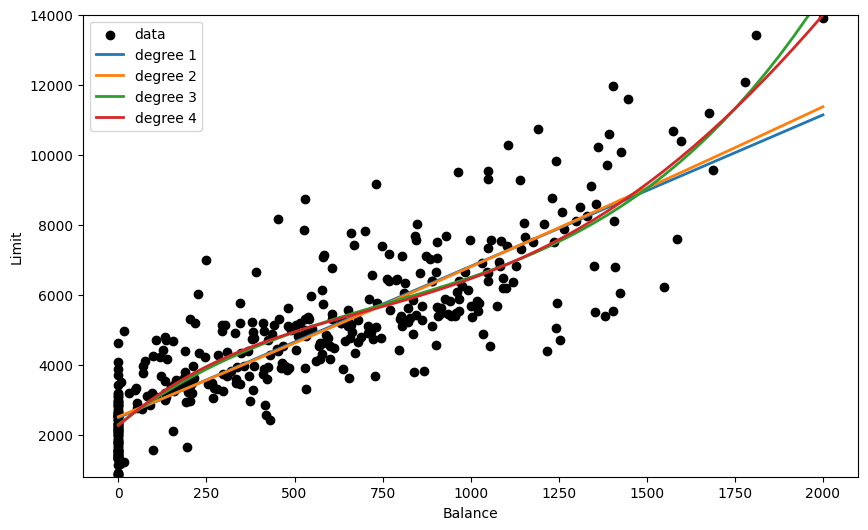

In [138]:
# fit polynomial models
mr1 = sm.ols(formula="Limit ~ Balance", data=credit).fit()
par1 = dict(mr1.params)
mr2 = sm.ols(formula="Limit ~ Balance + I(Balance ** 2.0)", data=credit).fit()
par2 = dict(mr2.params)
mr3 = sm.ols(formula="Limit ~ Balance + I(Balance ** 2.0) + I(Balance ** 3.0)", data=credit).fit()
par3 = dict(mr3.params)
mr4 = sm.ols(formula="Limit ~ Balance + I(Balance ** 2.0) + I(Balance ** 3.0) + I(Balance ** 4.0)", data=credit).fit()
par4 = dict(mr4.params)

# make scatterplot of data
plt.scatter(credit['Balance'],credit['Limit'],color='black',label="data")

# evaluate polynomial models on a grid
x = np.linspace(0,2000)
y1 = par1["Intercept"] + par1['Balance']*x
y2 = par2["Intercept"] + par2['Balance']*x + par2['I(Balance ** 2.0)']*x**2
y3 = par3["Intercept"] + par3['Balance']*x + par3['I(Balance ** 2.0)']*x**2 + par3['I(Balance ** 3.0)']*x**3
y4 = par4["Intercept"] + par4['Balance']*x + par4['I(Balance ** 2.0)']*x**2 + par4['I(Balance ** 3.0)']*x**3 + par4['I(Balance ** 4.0)']*x**4

# plot polynomial models
plt.plot(x,y1,label="degree 1",linewidth=2)
plt.plot(x,y2,label="degree 2",linewidth=2)
plt.plot(x,y3,label="degree 3",linewidth=2)
plt.plot(x,y4,label="degree 4",linewidth=2)
plt.legend()
plt.xlabel('Balance'); plt.ylabel('Limit')
plt.ylim((800,14000))
plt.show()

In [139]:
print('mr1:',mr1.rsquared)
print('mr2:',mr2.rsquared)
print('mr3:',mr3.rsquared)
print('mr4:',mr4.rsquared)

mr1: 0.7425221799818014
mr2: 0.7427252781330149
mr3: 0.7620296380884278
mr4: 0.7626801634867344


У баланса при увеличении полинома коэффициент детерминации вырос всего лишь на 2%

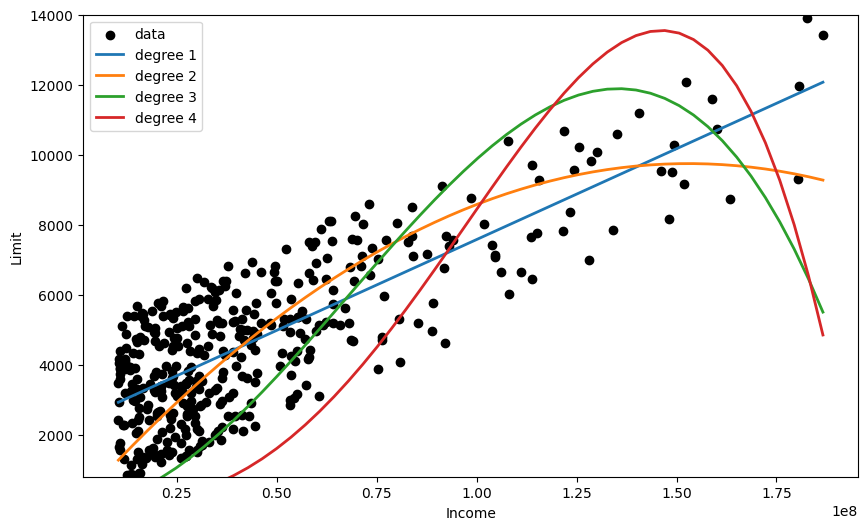

In [140]:
# fit polynomial models
mr1 = sm.ols(formula="Limit ~ Income", data=credit).fit()
par1 = dict(mr1.params)
mr2 = sm.ols(formula="Limit ~ Income + I(Income ** 2.0)", data=credit).fit()
par2 = dict(mr2.params)
mr3 = sm.ols(formula="Limit ~ Income + I(Income ** 2.0) + I(Income ** 3.0)", data=credit).fit()
par3 = dict(mr3.params)
mr4 = sm.ols(formula="Limit ~ Income + I(Income ** 2.0) + I(Income ** 3.0) + I(Income ** 4.0)", data=credit).fit()
par4 = dict(mr4.params)

# make scatterplot of data
plt.scatter(credit['Income'],credit['Limit'],color='black',label="data")

# evaluate polynomial models on a grid
x = np.linspace(10354000,186635000)
y1 = par1["Intercept"] + par1['Income']*x
y2 = par2["Intercept"] + par2['Income']*x + par2['I(Income ** 2.0)']*x**2
y3 = par3["Intercept"] + par3['Income']*x + par3['I(Income ** 2.0)']*x**2 + par3['I(Income ** 3.0)']*x**3
y4 = par4["Intercept"] + par4['Income']*x + par4['I(Income ** 2.0)']*x**2 + par4['I(Income ** 3.0)']*x**3 + par4['I(Income ** 4.0)']*x**4

# plot polynomial models
plt.plot(x,y1,label="degree 1",linewidth=2)
plt.plot(x,y2,label="degree 2",linewidth=2)
plt.plot(x,y3,label="degree 3",linewidth=2)
plt.plot(x,y4,label="degree 4",linewidth=2)
plt.legend()
plt.xlabel('Income'); plt.ylabel('Limit')
plt.ylim((800,14000))
plt.show()

In [141]:
print('mr1:',mr1.rsquared)
print('mr2:',mr2.rsquared)
print('mr3:',mr3.rsquared)
print('mr4:',mr4.rsquared)

mr1: 0.6274039404819071
mr2: 0.4731423554102644
mr3: -0.34933024702285076
mr4: -1.2933319250709383


У прибыли при увеличении полинома прогноз ухудшается

In [142]:
pred('Income + Balance + I(Balance ** 2.0) + I(Balance ** 3.0)')

Основные показатели модели:
R2 = 0.9523990618791364,
p-value = Intercept             1.077921e-77
Income               4.143363e-140
Balance               1.866695e-56
I(Balance ** 2.0)     1.700314e-13
I(Balance ** 3.0)     1.471507e-08
dtype: float64,
coeff =  Intercept            1279.581419
Income                  0.000034
Balance                 6.105258
I(Balance ** 2.0)      -0.003970
I(Balance ** 3.0)       0.000001
dtype: float64


Комбинация прибыли и полиномиального баланса ожидаемо дали +2% к доли описываемой дисперсии

Какие независимые переменные являются хорошими/плохими предикторами? Какая модель в целом является лучшей?

**Ваш ответ:**
Хорошими предикторами являются Прибыль и баланс, остальные не вносят статистически значимый вклад в прогноз.
Наилучшей моделью является "Limit =  1610.366499 + Income * 0.000033 + Balance * 3.162094", как как R2 = 0.93, p-value < 0.05, и в этом уравнении не используются полиномы, которые усложняют расчёты.

## Задание 3. Включение категориальных переменных в модель регрессии

Рассмотреть двоичные категориальные переменные, которые были ранее сопоставлены с целочисленными значениями 0, 1 в в `лекции 4.2`.

In [143]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})
dummy = pd.get_dummies(credit['Ethnicity'])
credit = pd.concat([credit,dummy],axis=1)
credit.rename(columns={'African American': 'African'}, inplace=True)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_num,Student_num,Married_num,African,Asian,Caucasian
1,14891000.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1,False,False,True
2,106025000.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1,1,False,True,False
3,104593000.0,7075,514,4,71,11,Male,No,No,Asian,580,0,0,0,False,True,False
4,148924000.0,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0,False,True,False
5,55882000.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,12096000.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0,0,1,False,False,True
397,13364000.0,3838,296,5,65,17,Male,No,No,African American,480,0,0,0,True,False,False
398,57872000.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138,1,0,1,False,False,True
399,37728000.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0,0,1,False,False,True


Можете ли улучшить модель, которая разработана в задании `2`, включив в нее одну или несколько из этих переменных?


Построение графиков по категориальным переменным для их анализа

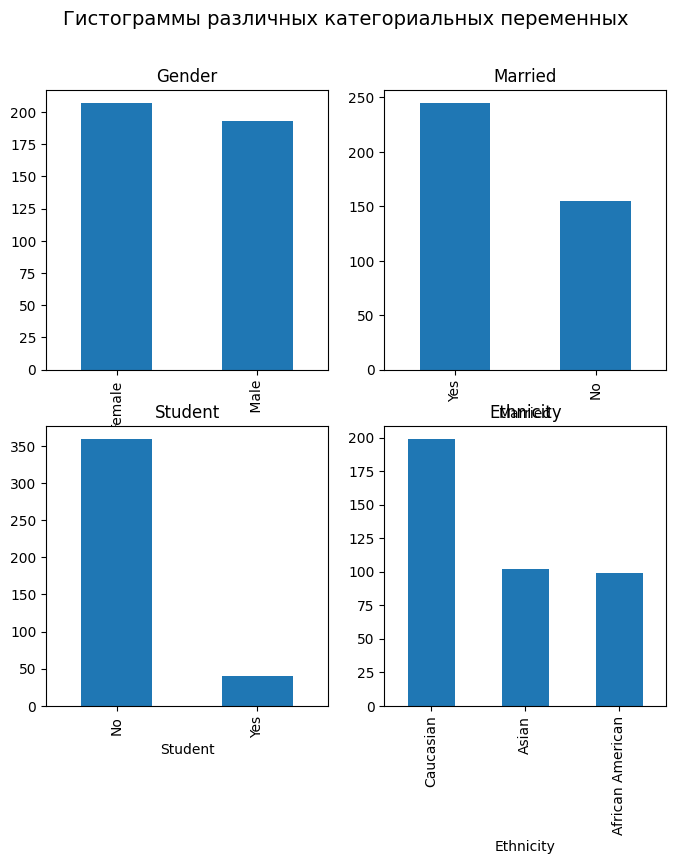

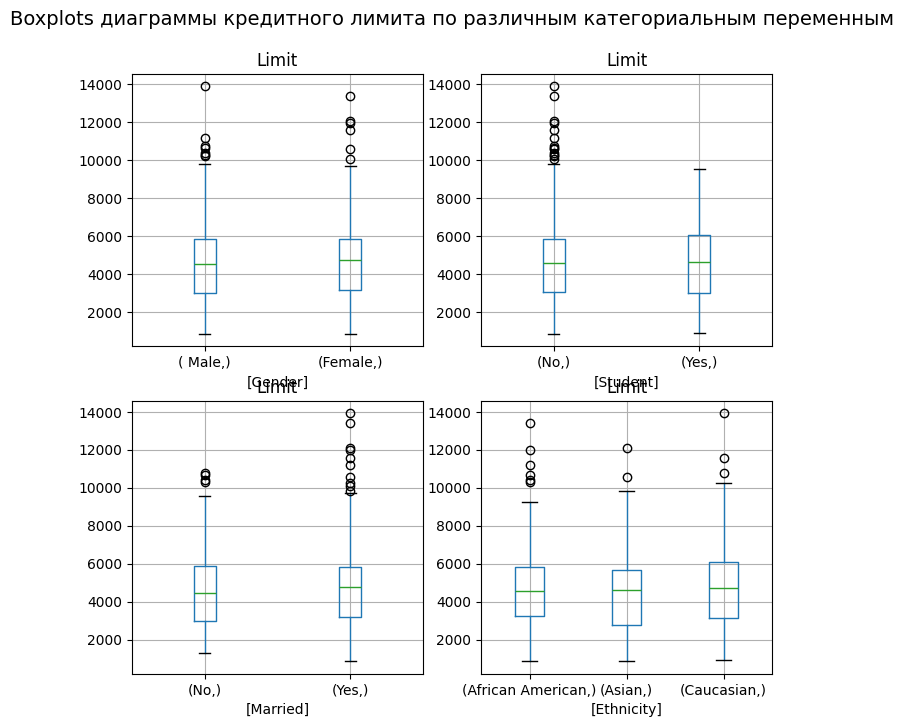

In [144]:
# Barplots
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8,8))
credit["Gender"].value_counts().plot(kind='bar',ax=axes[0,0],title='Gender');
credit["Student"].value_counts().plot(kind='bar',ax=axes[1,0],title='Student');
credit["Married"].value_counts().plot(kind='bar',ax=axes[0,1],title='Married');
credit["Ethnicity"].value_counts().plot(kind='bar',ax=axes[1,1],title='Ethnicity');
fig.suptitle('Гистограммы различных категориальных переменных',fontsize=14)
plt.show()

# Side-by-side boxplots for Limit by categories
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8,8))
credit.boxplot(column=['Limit'], by=['Gender'],ax=axes[0,0])
credit.boxplot(column=['Limit'], by=['Student'],ax=axes[0,1])
credit.boxplot(column=['Limit'], by=['Married'],ax=axes[1,0])
credit.boxplot(column=['Limit'], by=['Ethnicity'],ax=axes[1,1])
fig.suptitle('Boxplots диаграммы кредитного лимита по различным категориальным переменным', fontsize=14)
plt.show()

На графиках видно, что данные по мужчинам и женщинам почти идентичны как по поличеству так и по лимиту. Количество людей в браке больше чем не в браке и кредитные лимиты людей в браке немного выше. Количества студентов сильно меньше, при этом общий их крединый рейтинг выше, но на графике не студентов много выбросов в виде высоких лимитов, данных не достаточно, чтобы сделать выводы по поводу студентов.  Количество европиоидов в данных в два раза больше чем азиатов и африканских американцов, и у них же наибольшая планка кредитного лимита выше чем у азиатов и ариканцев, при этом медиана у всех рас примерно одинакова, у азиатов наибольшая планка выше, чем у африканцев, но 25% процентиль ниже.

In [145]:
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_num,Student_num,Married_num,African,Asian,Caucasian
1,14891000.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1,False,False,True
2,106025000.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1,1,False,True,False
3,104593000.0,7075,514,4,71,11,Male,No,No,Asian,580,0,0,0,False,True,False
4,148924000.0,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0,False,True,False
5,55882000.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,12096000.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0,0,1,False,False,True
397,13364000.0,3838,296,5,65,17,Male,No,No,African American,480,0,0,0,True,False,False
398,57872000.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138,1,0,1,False,False,True
399,37728000.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0,0,1,False,False,True


In [146]:
credit1 = credit.copy()
credit1 = credit1.drop(['Gender', 'Married', 'Student', 'Ethnicity'], axis=1)

In [147]:
correlation_matrix = credit1.corr()
correlation_matrix

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_num,Student_num,Married_num,African,Asian,Caucasian
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656,-0.010738,0.019632,0.035652,0.040132,-0.017137,-0.019701
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697,0.009397,-0.006015,0.031155,0.036320,-0.032427,-0.003081
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625,0.008885,-0.002028,0.036751,0.037598,-0.035999,-0.001070
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456,-0.022658,-0.026164,-0.009695,0.000878,0.005591,-0.005631
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835,0.004015,-0.029844,-0.073136,0.061169,-0.059623,-0.000822
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062,-0.005049,0.072085,0.048911,0.013827,0.029586,-0.037725
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000,0.021474,0.259018,-0.005673,0.013720,-0.009812,-0.003288
Gender_num,-0.010738,0.009397,0.008885,-0.022658,0.004015,-0.005049,0.021474,1.000000,0.055034,0.012452,-0.014288,0.025425,-0.009831
Student_num,0.019632,-0.006015,-0.002028,-0.026164,-0.029844,0.072085,0.259018,0.055034,1.000000,-0.076974,0.001931,0.053534,-0.048334
Married_num,0.035652,0.031155,0.036751,-0.009695,-0.073136,0.048911,-0.005673,0.012452,-0.076974,1.000000,-0.102707,0.088595,0.011418


По матрице корелляций можно заметить, что ниодна категориальная переменная нискем не кореллирует, проверим не модели.

In [148]:
pred('Income + Balance + Gender_num + African + Asian + Caucasian')

Основные показатели модели:
R2 = 0.9391420615592062,
p-value = Intercept             1.399241e-92
African[T.True]       8.762041e-18
Asian[T.True]         8.068669e-12
Caucasian[T.True]     4.164049e-25
Income               3.745247e-125
Balance              6.014584e-157
Gender_num            8.912930e-01
dtype: float64,
coeff =  Intercept            1200.939367
African[T.True]       437.256883
Asian[T.True]         336.660342
Caucasian[T.True]     427.022150
Income                  0.000033
Balance                 3.161663
Gender_num              7.847829
dtype: float64


R2 почти не поменялся, можно сделать вывод, что категореальные переменные в данном случае никак не влияют на кредитный лимит

**Ваш ответ:**